In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.virtual_documents', '__notebook_source__.ipynb']


In [3]:
dataset=pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv")

In [4]:
type(dataset)

pandas.core.frame.DataFrame

In [5]:
dataset.shape

(303, 14)

In [6]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1,0
215,43,0,0,132,341,1,0,136,1,3.0,1,0,3,0
41,48,1,1,130,245,0,0,180,0,0.2,1,0,2,1
257,50,1,0,144,200,0,0,126,1,0.9,1,0,3,0


In [8]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
info=["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [11]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [12]:
dataset["target"].unique()

array([1, 0])

In [13]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


1    165
0    138
Name: target, dtype: int64


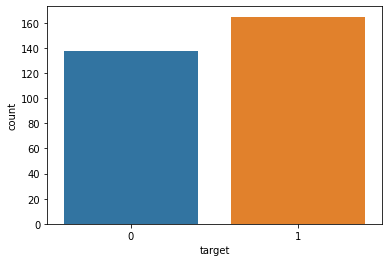

In [14]:
y = dataset["target"]

sns.countplot(y)

target_temp = dataset.target.value_counts()
print(target_temp)

In [15]:
print("The Percentage of patients without Heart problems are= "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patients with Heart problems are= "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

The Percentage of patients without Heart problems are= 45.54
Percentage of patients with Heart problems are= 54.46


In [16]:
dataset["sex"].unique()

array([1, 0])

<AxesSubplot:xlabel='sex', ylabel='target'>

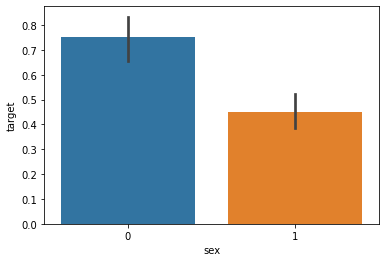

In [17]:
sns.barplot(dataset["sex"],y)

In [18]:
dataset["cp"].unique()

array([3, 2, 1, 0])

<AxesSubplot:xlabel='cp', ylabel='target'>

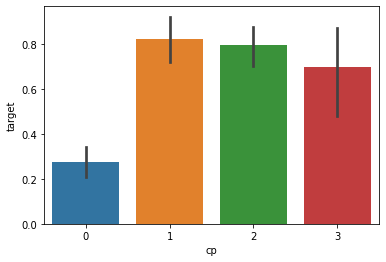

In [19]:
sns.barplot(dataset["cp"],y)

In [20]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [21]:
dataset["fbs"].unique()

array([1, 0])

<AxesSubplot:xlabel='fbs', ylabel='target'>

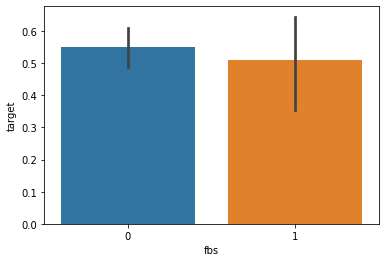

In [22]:
sns.barplot(dataset["fbs"],y)

In [23]:
dataset["restecg"].unique()

array([0, 1, 2])

<AxesSubplot:xlabel='restecg', ylabel='target'>

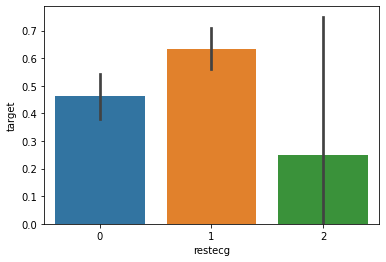

In [24]:
sns.barplot(dataset["restecg"],y)

In [25]:
dataset["exang"].unique()

array([0, 1])

<AxesSubplot:xlabel='exang', ylabel='target'>

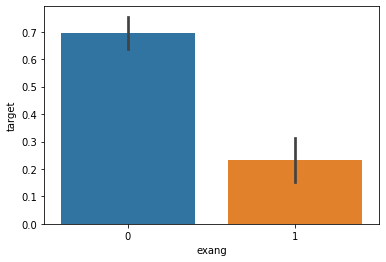

In [26]:
sns.barplot(dataset["exang"],y)

In [27]:
dataset["slope"].unique()

array([0, 2, 1])

<AxesSubplot:xlabel='slope', ylabel='target'>

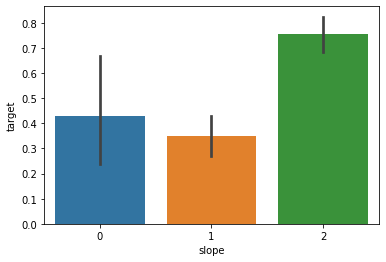

In [28]:
sns.barplot(dataset["slope"],y)

In [29]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

<AxesSubplot:xlabel='ca', ylabel='count'>

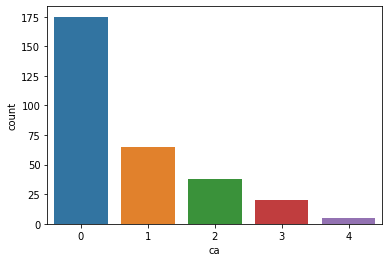

In [30]:
sns.countplot(dataset["ca"])

<AxesSubplot:xlabel='ca', ylabel='target'>

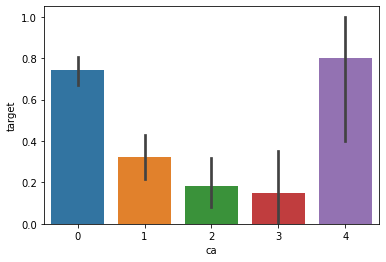

In [31]:
sns.barplot(dataset["ca"],y)

In [32]:
dataset["thal"].unique()

array([1, 2, 3, 0])

<AxesSubplot:xlabel='thal', ylabel='target'>

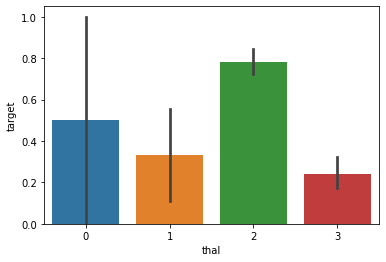

In [33]:
sns.barplot(dataset["thal"],y)

<AxesSubplot:xlabel='thal', ylabel='Density'>

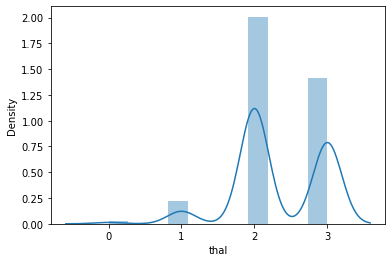

In [34]:
sns.distplot(dataset["thal"])

**Train - Test Split (80-20)**

In [35]:
from sklearn.model_selection import train_test_split

predictors=dataset.drop("target",axis=1)
target=dataset["target"]

X_train,X_test,Y_train,Y_test=train_test_split(predictors,target,test_size=0.20,random_state=0)

In [36]:
X_train.shape

(242, 13)

In [37]:
X_test.shape

(61, 13)

In [38]:
Y_train.shape

(242,)

In [39]:
Y_test.shape

(61,)

In [40]:
from sklearn.metrics import accuracy_score

**Logistic Regression**

In [42]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred_lr=lr.predict(X_test)

In [43]:
Y_pred_lr.shape

(61,)

In [44]:
score_lr=round(accuracy_score(Y_pred_lr,Y_test)*100,2)
print("The Accuracy score achieved using Logistic Regression Algorithm is= "+str(score_lr)+" %")

The Accuracy score achieved using Logistic Regression Algorithm is= 85.25 %


In [46]:
from sklearn import metrics
# Creating the confusion matrix
cm=metrics.confusion_matrix(Y_test,Y_pred_lr)
# Assigning columns names
cm_df=pd.DataFrame(cm, columns=['Predicted Negative','Predicted Positive'], index=['Actual Negative','Actual Positive'])
# Showing the confusion matrix
cm_df
cm_df=cm_df.values
cm_df

array([[22,  5],
       [ 4, 30]])

In [47]:
def confusion_metrics(conf_matrix):
# save confusion matrix and slice into four pieces
    TP=conf_matrix[1][1]
    TN=conf_matrix[0][0]
    FP=conf_matrix[0][1]
    FN=conf_matrix[1][0]
    print('True Positives=', TP)
    print('True Negatives=', TN)
    print('False Positives=', FP)
    print('False Negatives=', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy= {round(conf_accuracy,2)}') 
    print(f'Mis-Classification= {round(conf_misclassification,2)}') 
    print(f'Sensitivity= {round(conf_sensitivity,2)}') 
    print(f'Specificity= {round(conf_specificity,2)}') 
    print(f'Precision= {round(conf_precision,2)}')
    print(f'F1 Score= {round(conf_f1,2)}')
    
    
confusion_metrics(cm_df)

True Positives= 30
True Negatives= 22
False Positives= 5
False Negatives= 4
--------------------------------------------------
Accuracy= 0.85
Mis-Classification= 0.15
Sensitivity= 0.88
Specificity= 0.81
Precision= 0.81
F1 Score= 0.85


**Naive Bayes**

In [48]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(X_train,Y_train)
Y_pred_nb=nb.predict(X_test)

In [49]:
Y_pred_nb.shape

(61,)

In [50]:
score_nb=round(accuracy_score(Y_pred_nb,Y_test)*100,2)
print("The Accuracy score achieved using Naive Bayes Algorithm is= "+str(score_nb)+" %")

The Accuracy score achieved using Naive Bayes Algorithm is= 85.25 %


In [51]:
from sklearn import metrics
# Creating the confusion matrix
cm=metrics.confusion_matrix(Y_test, Y_pred_nb)
# Assigning columns names
cm_df=pd.DataFrame(cm, columns=['Predicted Negative','Predicted Positive'], index=['Actual Negative','Actual Positive'])
# Showing the confusion matrix
cm_df
cm_df=cm_df.values
cm_df

array([[21,  6],
       [ 3, 31]])

In [52]:
def confusion_metrics(conf_matrix):
# save confusion matrix and slice into four pieces
    TP=conf_matrix[1][1]
    TN=conf_matrix[0][0]
    FP=conf_matrix[0][1]
    FN=conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy= {round(conf_accuracy,2)}') 
    print(f'Mis-Classification= {round(conf_misclassification,2)}') 
    print(f'Sensitivity= {round(conf_sensitivity,2)}') 
    print(f'Specificity= {round(conf_specificity,2)}') 
    print(f'Precision= {round(conf_precision,2)}')
    print(f'F1 Score= {round(conf_f1,2)}')
    
    
confusion_metrics(cm_df)

True Positives: 31
True Negatives: 21
False Positives: 6
False Negatives: 3
--------------------------------------------------
Accuracy= 0.85
Mis-Classification= 0.15
Sensitivity= 0.91
Specificity= 0.78
Precision= 0.78
F1 Score= 0.84


**Support Vector Machine - SVM**

In [53]:
from sklearn import svm

sv=svm.SVC(kernel='linear')
sv.fit(X_train, Y_train)
Y_pred_svm=sv.predict(X_test)

In [54]:
Y_pred_svm.shape

(61,)

In [55]:
score_svm=round(accuracy_score(Y_pred_svm,Y_test)*100,2)
print("The Accuracy score achieved using Linear Support Vector Machine (SVM) Algorithm is= "+str(score_svm)+" %")

The Accuracy score achieved using Linear Support Vector Machine (SVM) Algorithm is= 81.97 %


In [56]:
from sklearn import metrics
# Creating the confusion matrix
cm=metrics.confusion_matrix(Y_test, Y_pred_svm)
# Assigning columns names
cm_df=pd.DataFrame(cm, columns=['Predicted Negative','Predicted Positive'], index=['Actual Negative','Actual Positive'])
# Showing the confusion matrix
cm_df
cm_df=cm_df.values
cm_df

array([[20,  7],
       [ 4, 30]])

In [57]:
def confusion_metrics(conf_matrix):
# save confusion matrix and slice into four pieces
    TP=conf_matrix[1][1]
    TN=conf_matrix[0][0]
    FP=conf_matrix[0][1]
    FN=conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy= {round(conf_accuracy,2)}') 
    print(f'Mis-Classification= {round(conf_misclassification,2)}') 
    print(f'Sensitivity= {round(conf_sensitivity,2)}') 
    print(f'Specificity= {round(conf_specificity,2)}') 
    print(f'Precision= {round(conf_precision,2)}')
    print(f'F1 Score= {round(conf_f1,2)}')
    
    
confusion_metrics(cm_df)

True Positives: 30
True Negatives: 20
False Positives: 7
False Negatives: 4
--------------------------------------------------
Accuracy= 0.82
Mis-Classification= 0.18
Sensitivity= 0.88
Specificity= 0.74
Precision= 0.74
F1 Score= 0.81


**K - Nearest Neighbour (KNN)**

In [58]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [59]:
Y_pred_knn.shape

(61,)

In [60]:
score_knn=round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("The Accuracy score achieved using K-Nearest Neighbour (KNN) Algorithm is= "+str(score_knn)+" %")

The Accuracy score achieved using K-Nearest Neighbour (KNN) Algorithm is= 67.21 %


In [61]:
from sklearn import metrics
# Creating the confusion matrix
cm=metrics.confusion_matrix(Y_test, Y_pred_knn)
# Assigning columns names
cm_df=pd.DataFrame(cm, columns=['Predicted Negative','Predicted Positive'], index=['Actual Negative','Actual Positive'])
# Showing the confusion matrix
cm_df
cm_df=cm_df.values
cm_df

array([[18,  9],
       [11, 23]])

In [62]:
def confusion_metrics(conf_matrix):
# save confusion matrix and slice into four pieces
    TP=conf_matrix[1][1]
    TN=conf_matrix[0][0]
    FP=conf_matrix[0][1]
    FN=conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy= {round(conf_accuracy,2)}') 
    print(f'Mis-Classification= {round(conf_misclassification,2)}') 
    print(f'Sensitivity= {round(conf_sensitivity,2)}') 
    print(f'Specificity= {round(conf_specificity,2)}') 
    print(f'Precision= {round(conf_precision,2)}')
    print(f'F1 Score= {round(conf_f1,2)}')
    
    
confusion_metrics(cm_df)

True Positives: 23
True Negatives: 18
False Positives: 9
False Negatives: 11
--------------------------------------------------
Accuracy= 0.67
Mis-Classification= 0.33
Sensitivity= 0.68
Specificity= 0.67
Precision= 0.67
F1 Score= 0.67


**Decision Tree**

In [63]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy=0

for x in range(200):
    dt=DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt=dt.predict(X_test)
    current_accuracy=round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy=current_accuracy
        best_x=x
        
#print(max_accuracy)
#print(best_x)

dt=DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt=dt.predict(X_test)

In [64]:
print(Y_pred_dt.shape)

(61,)


In [65]:
score_dt=round(accuracy_score(Y_pred_dt,Y_test)*100,2)
print("The Accuracy score achieved using the Decision Tree Algorithm is= "+str(score_dt)+" %")

The Accuracy score achieved using the Decision Tree Algorithm is= 81.97 %


In [66]:
from sklearn import metrics
# Creating the confusion matrix
cm=metrics.confusion_matrix(Y_test, Y_pred_dt)
# Assigning columns names
cm_df=pd.DataFrame(cm, columns=['Predicted Negative','Predicted Positive'], index=['Actual Negative','Actual Positive'])
# Showing the confusion matrix
cm_df
cm_df=cm_df.values
cm_df

array([[22,  5],
       [ 6, 28]])

In [67]:
def confusion_metrics(conf_matrix):
# save confusion matrix and slice into four pieces
    TP=conf_matrix[1][1]
    TN=conf_matrix[0][0]
    FP=conf_matrix[0][1]
    FN=conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy= {round(conf_accuracy,2)}') 
    print(f'Mis-Classification= {round(conf_misclassification,2)}') 
    print(f'Sensitivity= {round(conf_sensitivity,2)}') 
    print(f'Specificity= {round(conf_specificity,2)}') 
    print(f'Precision= {round(conf_precision,2)}')
    print(f'F1 Score= {round(conf_f1,2)}')
    
    
confusion_metrics(cm_df)

True Positives: 28
True Negatives: 22
False Positives: 5
False Negatives: 6
--------------------------------------------------
Accuracy= 0.82
Mis-Classification= 0.18
Sensitivity= 0.82
Specificity= 0.81
Precision= 0.81
F1 Score= 0.82


**Random Forest**

In [68]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy=0

for x in range(2000):
    rf=RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf=rf.predict(X_test)
    current_accuracy=round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy=current_accuracy
        best_x=x
        
#print(max_accuracy)
#print(best_x)

rf=RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf=rf.predict(X_test)

In [69]:
Y_pred_rf.shape

(61,)

In [70]:
score_rf=round(accuracy_score(Y_pred_rf,Y_test)*100,2)
print("The Accuracy score achieved using Random Forest Algorithm is= "+str(score_rf)+" %")

The Accuracy score achieved using Random Forest Algorithm is= 90.16 %


In [71]:
from sklearn import metrics
# Creating the confusion matrix
cm=metrics.confusion_matrix(Y_test, Y_pred_rf)
# Assigning columns names
cm_df=pd.DataFrame(cm, columns=['Predicted Negative','Predicted Positive'], index=['Actual Negative','Actual Positive'])
# Showing the confusion matrix
cm_df
cm_df=cm_df.values
cm_df

array([[23,  4],
       [ 2, 32]])

In [72]:
def confusion_metrics(conf_matrix):
# save confusion matrix and slice into four pieces
    TP=conf_matrix[1][1]
    TN=conf_matrix[0][0]
    FP=conf_matrix[0][1]
    FN=conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy= {round(conf_accuracy,2)}') 
    print(f'Mis-Classification= {round(conf_misclassification,2)}') 
    print(f'Sensitivity= {round(conf_sensitivity,2)}') 
    print(f'Specificity= {round(conf_specificity,2)}') 
    print(f'Precision= {round(conf_precision,2)}')
    print(f'F1 Score= {round(conf_f1,2)}')
    
    
confusion_metrics(cm_df)

True Positives: 32
True Negatives: 23
False Positives: 4
False Negatives: 2
--------------------------------------------------
Accuracy= 0.9
Mis-Classification= 0.1
Sensitivity= 0.94
Specificity= 0.85
Precision= 0.85
F1 Score= 0.89


**Neural Network**

In [73]:
from keras.models import Sequential
from keras.layers import Dense

In [74]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

2022-10-03 18:45:08.460833: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [75]:
model.fit(X_train,Y_train,epochs=300)

2022-10-03 18:45:11.152542: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/300
8/8 [==============================] - 1s 3ms/step - loss: 7.7396 - accuracy: 0.5413
Epoch 2/300
8/8 [==============================] - 0s 3ms/step - loss: 2.9454 - accuracy: 0.5372
Epoch 3/300
8/8 [==============================] - 0s 3ms/step - loss: 1.2550 - accuracy: 0.5041
Epoch 4/300
8/8 [==============================] - 0s 3ms/step - loss: 1.1427 - accuracy: 0.5000
Epoch 5/300
8/8 [==============================] - 0s 2ms/step - loss: 0.8387 - accuracy: 0.6157
Epoch 6/300
8/8 [==============================] - 0s 3ms/step - loss: 0.7290 - accuracy: 0.6488
Epoch 7/300
8/8 [==============================] - 0s 2ms/step - loss: 0.7013 - accuracy: 0.6488
Epoch 8/300
8/8 [==============================] - 0s 2ms/step - loss: 0.7215 - accuracy: 0.6364
Epoch 9/300
8/8 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.6322
Epoch 10/300
8/8 [==============================] - 0s 3ms/step - loss: 0.6636 - accuracy: 0.6612
Epoch 11/300
8/8 [===========

In [76]:
Y_pred_nn=model.predict(X_test)

In [77]:
Y_pred_nn.shape

(61, 1)

In [78]:
rounded=[round(x[0]) for x in Y_pred_nn]
Y_pred_nn=rounded

In [79]:
score_nn=round(accuracy_score(Y_pred_nn,Y_test)*100,2)
print("The Accuracy score achieved using Neural Network is= "+str(score_nn)+" %")
#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11. 

The Accuracy score achieved using Neural Network is= 78.69 %


**Output and Final Score**

In [80]:
scores=[score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_nn]
algorithms=["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","Neural Network"]    

for i in range(len(algorithms)):
    print("The Accuracy score achieved using "+algorithms[i]+" Algorithm is= "+str(scores[i])+" %")


The Accuracy score achieved using Logistic Regression Algorithm is= 85.25 %
The Accuracy score achieved using Naive Bayes Algorithm is= 85.25 %
The Accuracy score achieved using Support Vector Machine Algorithm is= 81.97 %
The Accuracy score achieved using K-Nearest Neighbors Algorithm is= 67.21 %
The Accuracy score achieved using Decision Tree Algorithm is= 81.97 %
The Accuracy score achieved using Random Forest Algorithm is= 90.16 %
The Accuracy score achieved using Neural Network Algorithm is= 78.69 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

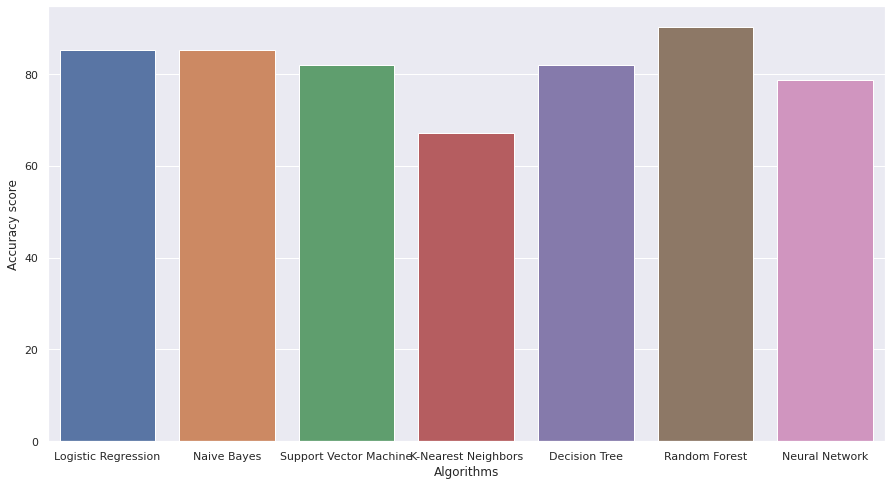

In [81]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithms,scores)

**Train - Test Split (70-30)**

In [82]:
from sklearn.model_selection import train_test_split

predictors=dataset.drop("target",axis=1)
target=dataset["target"]
X_train,X_test,Y_train,Y_test=train_test_split(predictors,target,test_size=0.30,random_state=0)

**Logistic Regression**

In [83]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred_lr=lr.predict(X_test)
Y_pred_lr.shape

(91,)

In [84]:
score_lr=round(accuracy_score(Y_pred_lr,Y_test)*100,2)
print("The Accuracy score achieved using Logistic Regression Algorithm is= "+str(score_lr)+" %")

The Accuracy score achieved using Logistic Regression Algorithm is= 83.52 %


In [85]:
from sklearn import metrics
# Creating the confusion matrix
cm=metrics.confusion_matrix(Y_test, Y_pred_lr)
# Assigning columns names
cm_df=pd.DataFrame(cm, columns=['Predicted Negative','Predicted Positive'], index=['Actual Negative','Actual Positive'])
# Showing the confusion matrix
cm_df
cm_df=cm_df.values
cm_df

array([[33, 11],
       [ 4, 43]])

In [86]:
def confusion_metrics(conf_matrix):
# save confusion matrix and slice into four pieces
    TP=conf_matrix[1][1]
    TN=conf_matrix[0][0]
    FP=conf_matrix[0][1]
    FN=conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy= {round(conf_accuracy,2)}') 
    print(f'Mis-Classification= {round(conf_misclassification,2)}') 
    print(f'Sensitivity= {round(conf_sensitivity,2)}') 
    print(f'Specificity= {round(conf_specificity,2)}') 
    print(f'Precision= {round(conf_precision,2)}')
    print(f'F1 Score= {round(conf_f1,2)}')
    
    
confusion_metrics(cm_df)

True Positives: 43
True Negatives: 33
False Positives: 11
False Negatives: 4
--------------------------------------------------
Accuracy= 0.84
Mis-Classification= 0.16
Sensitivity= 0.91
Specificity= 0.75
Precision= 0.75
F1 Score= 0.82


**Naive Bayes**

In [87]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(X_train,Y_train)
Y_pred_nb=nb.predict(X_test)
Y_pred_nb.shape

(91,)

In [88]:
score_nb=round(accuracy_score(Y_pred_nb,Y_test)*100,2)
print("The Accuracy score achieved using Naive Bayes Algorithm is= "+str(score_nb)+" %")

The Accuracy score achieved using Naive Bayes Algorithm is= 80.22 %


In [89]:
from sklearn import metrics
# Creating the confusion matrix
cm=metrics.confusion_matrix(Y_test, Y_pred_lr)
# Assigning columns names
cm_df=pd.DataFrame(cm, columns=['Predicted Negative','Predicted Positive'], index=['Actual Negative','Actual Positive'])
# Showing the confusion matrix
cm_df
cm_df=cm_df.values
cm_df

array([[33, 11],
       [ 4, 43]])

In [90]:
def confusion_metrics(conf_matrix):
# save confusion matrix and slice into four pieces
    TP=conf_matrix[1][1]
    TN=conf_matrix[0][0]
    FP=conf_matrix[0][1]
    FN=conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy= {round(conf_accuracy,2)}') 
    print(f'Mis-Classification= {round(conf_misclassification,2)}') 
    print(f'Sensitivity= {round(conf_sensitivity,2)}') 
    print(f'Specificity= {round(conf_specificity,2)}') 
    print(f'Precision= {round(conf_precision,2)}')
    print(f'F1 Score= {round(conf_f1,2)}')
    
    
confusion_metrics(cm_df)

True Positives: 43
True Negatives: 33
False Positives: 11
False Negatives: 4
--------------------------------------------------
Accuracy= 0.84
Mis-Classification= 0.16
Sensitivity= 0.91
Specificity= 0.75
Precision= 0.75
F1 Score= 0.82


**Support Vector Machine - SVM**

In [91]:
from sklearn import svm

sv=svm.SVC(kernel='linear')
sv.fit(X_train,Y_train)
Y_pred_svm=sv.predict(X_test)
Y_pred_svm.shape

(91,)

In [92]:
score_svm=round(accuracy_score(Y_pred_svm,Y_test)*100,2)
print("The Accuracy score achieved using Linear Support Vector Machine (SVM) Algorithm is= "+str(score_svm)+" %")

The Accuracy score achieved using Linear Support Vector Machine (SVM) Algorithm is= 81.32 %


In [93]:
from sklearn import metrics
# Creating the confusion matrix
cm=metrics.confusion_matrix(Y_test, Y_pred_lr)
# Assigning columns names
cm_df=pd.DataFrame(cm, columns=['Predicted Negative','Predicted Positive'], index=['Actual Negative','Actual Positive'])
# Showing the confusion matrix
cm_df
cm_df=cm_df.values
cm_df

array([[33, 11],
       [ 4, 43]])

In [94]:
def confusion_metrics(conf_matrix):
# save confusion matrix and slice into four pieces
    TP=conf_matrix[1][1]
    TN=conf_matrix[0][0]
    FP=conf_matrix[0][1]
    FN=conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy= {round(conf_accuracy,2)}') 
    print(f'Mis-Classification= {round(conf_misclassification,2)}') 
    print(f'Sensitivity= {round(conf_sensitivity,2)}') 
    print(f'Specificity= {round(conf_specificity,2)}') 
    print(f'Precision= {round(conf_precision,2)}')
    print(f'F1 Score= {round(conf_f1,2)}')
    
    
confusion_metrics(cm_df)

True Positives: 43
True Negatives: 33
False Positives: 11
False Negatives: 4
--------------------------------------------------
Accuracy= 0.84
Mis-Classification= 0.16
Sensitivity= 0.91
Specificity= 0.75
Precision= 0.75
F1 Score= 0.82


**K - Nearest Neighbour (KNN)**

In [96]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
Y_pred_knn.shape

(91,)

In [97]:
score_knn=round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("The Accuracy score achieved using K-Nearest Neighbour (KNN) Algorithm is= "+str(score_knn)+" %")

The Accuracy score achieved using K-Nearest Neighbour (KNN) Algorithm is= 69.23 %


In [98]:
from sklearn import metrics
# Creating the confusion matrix
cm=metrics.confusion_matrix(Y_test, Y_pred_lr)
# Assigning columns names
cm_df=pd.DataFrame(cm, columns=['Predicted Negative','Predicted Positive'], index=['Actual Negative','Actual Positive'])
# Showing the confusion matrix
cm_df
cm_df=cm_df.values
cm_df

array([[33, 11],
       [ 4, 43]])

In [99]:
def confusion_metrics(conf_matrix):
# save confusion matrix and slice into four pieces
    TP=conf_matrix[1][1]
    TN=conf_matrix[0][0]
    FP=conf_matrix[0][1]
    FN=conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy= {round(conf_accuracy,2)}') 
    print(f'Mis-Classification= {round(conf_misclassification,2)}') 
    print(f'Sensitivity= {round(conf_sensitivity,2)}') 
    print(f'Specificity= {round(conf_specificity,2)}') 
    print(f'Precision= {round(conf_precision,2)}')
    print(f'F1 Score= {round(conf_f1,2)}')
    
    
confusion_metrics(cm_df)

True Positives: 43
True Negatives: 33
False Positives: 11
False Negatives: 4
--------------------------------------------------
Accuracy= 0.84
Mis-Classification= 0.16
Sensitivity= 0.91
Specificity= 0.75
Precision= 0.75
F1 Score= 0.82


**Decision Tree**

In [100]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy=0

for x in range(200):
    dt=DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt=dt.predict(X_test)
    current_accuracy=round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy=current_accuracy
        best_x=x
        
#print(max_accuracy)
#print(best_x)

dt=DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt=dt.predict(X_test)
print(Y_pred_dt.shape)

(91,)


In [101]:
score_dt=round(accuracy_score(Y_pred_dt,Y_test)*100,2)
print("The Accuracy score achieved using Decision Tree Algorithm is= "+str(score_dt)+" %")

The Accuracy score achieved using Decision Tree Algorithm is= 75.82 %


In [102]:
from sklearn import metrics
# Creating the confusion matrix
cm=metrics.confusion_matrix(Y_test, Y_pred_lr)
# Assigning columns names
cm_df=pd.DataFrame(cm, columns=['Predicted Negative','Predicted Positive'], index=['Actual Negative','Actual Positive'])
# Showing the confusion matrix
cm_df
cm_df=cm_df.values
cm_df

array([[33, 11],
       [ 4, 43]])

In [103]:
def confusion_metrics(conf_matrix):
# save confusion matrix and slice into four pieces
    TP=conf_matrix[1][1]
    TN=conf_matrix[0][0]
    FP=conf_matrix[0][1]
    FN=conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy= {round(conf_accuracy,2)}') 
    print(f'Mis-Classification= {round(conf_misclassification,2)}') 
    print(f'Sensitivity= {round(conf_sensitivity,2)}') 
    print(f'Specificity= {round(conf_specificity,2)}') 
    print(f'Precision= {round(conf_precision,2)}')
    print(f'F1 Score= {round(conf_f1,2)}')
    
    
confusion_metrics(cm_df)

True Positives: 43
True Negatives: 33
False Positives: 11
False Negatives: 4
--------------------------------------------------
Accuracy= 0.84
Mis-Classification= 0.16
Sensitivity= 0.91
Specificity= 0.75
Precision= 0.75
F1 Score= 0.82


**Random Forest**

In [104]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy=0

for x in range(2000):
    rf=RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf=rf.predict(X_test)
    current_accuracy=round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy=current_accuracy
        best_x=x
        
#print(max_accuracy)
#print(best_x)

rf=RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf=rf.predict(X_test)
Y_pred_rf.shape

(91,)

In [106]:
score_rf=round(accuracy_score(Y_pred_rf,Y_test)*100,2)
print("The Accuracy score achieved using Random Forest Algorithm is= "+str(score_rf)+" %")

The Accuracy score achieved using Random Forest Algorithm is= 87.91 %


In [107]:
from sklearn import metrics
# Creating the confusion matrix
cm=metrics.confusion_matrix(Y_test, Y_pred_lr)
# Assigning columns names
cm_df=pd.DataFrame(cm, columns=['Predicted Negative','Predicted Positive'], index=['Actual Negative','Actual Positive'])
# Showing the confusion matrix
cm_df
cm_df=cm_df.values
cm_df

array([[33, 11],
       [ 4, 43]])

In [108]:
def confusion_metrics(conf_matrix):
# save confusion matrix and slice into four pieces
    TP=conf_matrix[1][1]
    TN=conf_matrix[0][0]
    FP=conf_matrix[0][1]
    FN=conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy= {round(conf_accuracy,2)}') 
    print(f'Mis-Classification= {round(conf_misclassification,2)}') 
    print(f'Sensitivity= {round(conf_sensitivity,2)}') 
    print(f'Specificity= {round(conf_specificity,2)}') 
    print(f'Precision= {round(conf_precision,2)}')
    print(f'F1 Score= {round(conf_f1,2)}')
    
    
confusion_metrics(cm_df)

True Positives: 43
True Negatives: 33
False Positives: 11
False Negatives: 4
--------------------------------------------------
Accuracy= 0.84
Mis-Classification= 0.16
Sensitivity= 0.91
Specificity= 0.75
Precision= 0.75
F1 Score= 0.82


**Output and Final Score**

In [110]:
scores=[score_lr,score_nb,score_svm,score_knn,score_dt,score_rf]
algorithms=["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The Accuracy score achieved using "+algorithms[i]+" Algorithm is= "+str(scores[i])+" %")

The Accuracy score achieved using Logistic Regression Algorithm is= 83.52 %
The Accuracy score achieved using Naive Bayes Algorithm is= 80.22 %
The Accuracy score achieved using Support Vector Machine Algorithm is= 81.32 %
The Accuracy score achieved using K-Nearest Neighbors Algorithm is= 69.23 %
The Accuracy score achieved using Decision Tree Algorithm is= 75.82 %
The Accuracy score achieved using Random Forest Algorithm is= 87.91 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

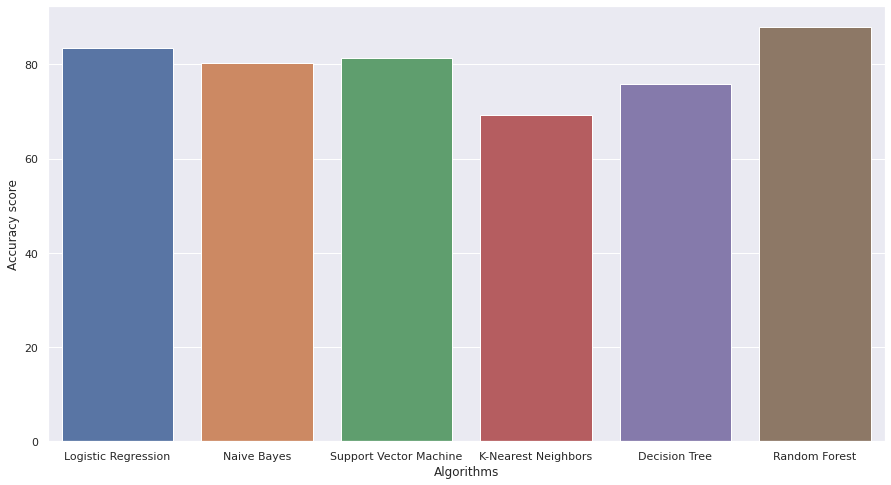

In [111]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithms,scores)

**Train - Test Split (60-40)**

In [112]:
from sklearn.model_selection import train_test_split

predictors=dataset.drop("target",axis=1)
target=dataset["target"]
X_train,X_test,Y_train,Y_test=train_test_split(predictors,target,test_size=0.40,random_state=0)

**Logistic Regression**

In [113]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred_lr=lr.predict(X_test)
Y_pred_lr.shape

(122,)

In [114]:
score_lr=round(accuracy_score(Y_pred_lr,Y_test)*100,2)
print("The Accuracy score achieved using Logistic Regression Algorithm is= "+str(score_lr)+" %")

The Accuracy score achieved using Logistic Regression Algorithm is= 81.97 %


In [115]:
from sklearn import metrics
# Creating the confusion matrix
cm=metrics.confusion_matrix(Y_test, Y_pred_lr)
# Assigning columns names
cm_df=pd.DataFrame(cm, columns=['Predicted Negative','Predicted Positive'], index=['Actual Negative','Actual Positive'])
# Showing the confusion matrix
cm_df
cm_df=cm_df.values
cm_df

array([[45, 14],
       [ 8, 55]])

In [116]:
def confusion_metrics(conf_matrix):
# save confusion matrix and slice into four pieces
    TP=conf_matrix[1][1]
    TN=conf_matrix[0][0]
    FP=conf_matrix[0][1]
    FN=conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy= {round(conf_accuracy,2)}') 
    print(f'Mis-Classification= {round(conf_misclassification,2)}') 
    print(f'Sensitivity= {round(conf_sensitivity,2)}') 
    print(f'Specificity= {round(conf_specificity,2)}') 
    print(f'Precision= {round(conf_precision,2)}')
    print(f'F1 Score= {round(conf_f1,2)}')
    
    
confusion_metrics(cm_df)

True Positives: 55
True Negatives: 45
False Positives: 14
False Negatives: 8
--------------------------------------------------
Accuracy= 0.82
Mis-Classification= 0.18
Sensitivity= 0.87
Specificity= 0.76
Precision= 0.76
F1 Score= 0.81


**Naive Bayes**

In [117]:
from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(X_train,Y_train)
Y_pred_nb=nb.predict(X_test)
Y_pred_nb.shape

(122,)

In [118]:
score_nb=round(accuracy_score(Y_pred_nb,Y_test)*100,2)
print("The Accuracy score achieved using Naive Bayes Algorithm is= "+str(score_nb)+" %")

The Accuracy score achieved using Naive Bayes Algorithm is= 79.51 %


In [119]:
from sklearn import metrics
# Creating the confusion matrix
cm=metrics.confusion_matrix(Y_test, Y_pred_lr)
# Assigning columns names
cm_df=pd.DataFrame(cm, columns=['Predicted Negative','Predicted Positive'], index=['Actual Negative','Actual Positive'])
# Showing the confusion matrix
cm_df
cm_df=cm_df.values
cm_df

array([[45, 14],
       [ 8, 55]])

In [120]:
def confusion_metrics(conf_matrix):
# save confusion matrix and slice into four pieces
    TP=conf_matrix[1][1]
    TN=conf_matrix[0][0]
    FP=conf_matrix[0][1]
    FN=conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy= {round(conf_accuracy,2)}') 
    print(f'Mis-Classification= {round(conf_misclassification,2)}') 
    print(f'Sensitivity= {round(conf_sensitivity,2)}') 
    print(f'Specificity= {round(conf_specificity,2)}') 
    print(f'Precision= {round(conf_precision,2)}')
    print(f'F1 Score= {round(conf_f1,2)}')
    
    
confusion_metrics(cm_df)

True Positives: 55
True Negatives: 45
False Positives: 14
False Negatives: 8
--------------------------------------------------
Accuracy= 0.82
Mis-Classification= 0.18
Sensitivity= 0.87
Specificity= 0.76
Precision= 0.76
F1 Score= 0.81


**Support Vector Machine - SVM**

In [121]:
from sklearn import svm

sv=svm.SVC(kernel='linear')
sv.fit(X_train,Y_train)
Y_pred_svm=sv.predict(X_test)
Y_pred_svm.shape

(122,)

In [122]:
score_svm=round(accuracy_score(Y_pred_svm,Y_test)*100,2)
print("The Accuracy score achieved using Linear Support Vector Machine (SVM) Algorithm is= "+str(score_svm)+" %")

The Accuracy score achieved using Linear Support Vector Machine (SVM) Algorithm is= 80.33 %


In [123]:
from sklearn import metrics
# Creating the confusion matrix
cm=metrics.confusion_matrix(Y_test, Y_pred_lr)
# Assigning columns names
cm_df=pd.DataFrame(cm, columns=['Predicted Negative','Predicted Positive'], index=['Actual Negative','Actual Positive'])
# Showing the confusion matrix
cm_df
cm_df=cm_df.values
cm_df

array([[45, 14],
       [ 8, 55]])

In [124]:
def confusion_metrics(conf_matrix):
# save confusion matrix and slice into four pieces
    TP=conf_matrix[1][1]
    TN=conf_matrix[0][0]
    FP=conf_matrix[0][1]
    FN=conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy= {round(conf_accuracy,2)}') 
    print(f'Mis-Classification= {round(conf_misclassification,2)}') 
    print(f'Sensitivity= {round(conf_sensitivity,2)}') 
    print(f'Specificity= {round(conf_specificity,2)}') 
    print(f'Precision= {round(conf_precision,2)}')
    print(f'F1 Score= {round(conf_f1,2)}')
    
    
confusion_metrics(cm_df)

True Positives: 55
True Negatives: 45
False Positives: 14
False Negatives: 8
--------------------------------------------------
Accuracy= 0.82
Mis-Classification= 0.18
Sensitivity= 0.87
Specificity= 0.76
Precision= 0.76
F1 Score= 0.81


**K - Nearest Neighbour (KNN)**

In [125]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
Y_pred_knn.shape

(122,)

In [126]:
score_knn=round(accuracy_score(Y_pred_knn,Y_test)*100,2)
print("The Accuracy score achieved using K-Nearest Neighbour (KNN) Algorithm is= "+str(score_knn)+" %")

The Accuracy score achieved using K-Nearest Neighbour (KNN) Algorithm is= 64.75 %


In [127]:
from sklearn import metrics
# Creating the confusion matrix
cm=metrics.confusion_matrix(Y_test, Y_pred_lr)
# Assigning columns names
cm_df=pd.DataFrame(cm, columns=['Predicted Negative','Predicted Positive'], index=['Actual Negative','Actual Positive'])
# Showing the confusion matrix
cm_df
cm_df=cm_df.values
cm_df

array([[45, 14],
       [ 8, 55]])

In [128]:
def confusion_metrics(conf_matrix):
# save confusion matrix and slice into four pieces
    TP=conf_matrix[1][1]
    TN=conf_matrix[0][0]
    FP=conf_matrix[0][1]
    FN=conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy= {round(conf_accuracy,2)}') 
    print(f'Mis-Classification= {round(conf_misclassification,2)}') 
    print(f'Sensitivity= {round(conf_sensitivity,2)}') 
    print(f'Specificity= {round(conf_specificity,2)}') 
    print(f'Precision= {round(conf_precision,2)}')
    print(f'F1 Score= {round(conf_f1,2)}')
    
    
confusion_metrics(cm_df)

True Positives: 55
True Negatives: 45
False Positives: 14
False Negatives: 8
--------------------------------------------------
Accuracy= 0.82
Mis-Classification= 0.18
Sensitivity= 0.87
Specificity= 0.76
Precision= 0.76
F1 Score= 0.81


**Decision Tree**

In [129]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy=0

for x in range(200):
    dt=DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt=dt.predict(X_test)
    current_accuracy=round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy=current_accuracy
        best_x=x
        
#print(max_accuracy)
#print(best_x)

dt=DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt=dt.predict(X_test)
print(Y_pred_dt.shape)

(122,)


In [130]:
score_dt=round(accuracy_score(Y_pred_dt,Y_test)*100,2)
print("The Accuracy score achieved using Decision Tree Algorithm is= "+str(score_dt)+" %")

The Accuracy score achieved using Decision Tree Algorithm is= 81.97 %


In [131]:
from sklearn import metrics
# Creating the confusion matrix
cm=metrics.confusion_matrix(Y_test, Y_pred_lr)
# Assigning columns names
cm_df=pd.DataFrame(cm, columns=['Predicted Negative','Predicted Positive'], index=['Actual Negative','Actual Positive'])
# Showing the confusion matrix
cm_df
cm_df=cm_df.values
cm_df

array([[45, 14],
       [ 8, 55]])

In [132]:
def confusion_metrics(conf_matrix):
# save confusion matrix and slice into four pieces
    TP=conf_matrix[1][1]
    TN=conf_matrix[0][0]
    FP=conf_matrix[0][1]
    FN=conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy= {round(conf_accuracy,2)}') 
    print(f'Mis-Classification= {round(conf_misclassification,2)}') 
    print(f'Sensitivity= {round(conf_sensitivity,2)}') 
    print(f'Specificity= {round(conf_specificity,2)}') 
    print(f'Precision= {round(conf_precision,2)}')
    print(f'F1 Score= {round(conf_f1,2)}')
    
    
confusion_metrics(cm_df)

True Positives: 55
True Negatives: 45
False Positives: 14
False Negatives: 8
--------------------------------------------------
Accuracy= 0.82
Mis-Classification= 0.18
Sensitivity= 0.87
Specificity= 0.76
Precision= 0.76
F1 Score= 0.81


**Random Forest**

In [133]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy=0

for x in range(2000):
    rf=RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf=rf.predict(X_test)
    current_accuracy=round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy=current_accuracy
        best_x=x
        
#print(max_accuracy)
#print(best_x)

rf=RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf=rf.predict(X_test)

In [135]:
Y_pred_rf.shape

(122,)

In [136]:
score_rf=round(accuracy_score(Y_pred_rf,Y_test)*100,2)
print("The Accuracy score achieved using Random Forest Algorithm is= "+str(score_rf)+" %")

The Accuracy score achieved using Random Forest Algorithm is= 85.25 %


In [137]:
from sklearn import metrics
# Creating the confusion matrix
cm=metrics.confusion_matrix(Y_test, Y_pred_lr)
# Assigning columns names
cm_df=pd.DataFrame(cm, columns=['Predicted Negative','Predicted Positive'], index=['Actual Negative','Actual Positive'])
# Showing the confusion matrix
cm_df
cm_df=cm_df.values
cm_df

array([[45, 14],
       [ 8, 55]])

In [138]:
def confusion_metrics(conf_matrix):
# save confusion matrix and slice into four pieces
    TP=conf_matrix[1][1]
    TN=conf_matrix[0][0]
    FP=conf_matrix[0][1]
    FN=conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)
    
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy= {round(conf_accuracy,2)}') 
    print(f'Mis-Classification= {round(conf_misclassification,2)}') 
    print(f'Sensitivity= {round(conf_sensitivity,2)}') 
    print(f'Specificity= {round(conf_specificity,2)}') 
    print(f'Precision= {round(conf_precision,2)}')
    print(f'F1 Score= {round(conf_f1,2)}')
    
    
confusion_metrics(cm_df)

True Positives: 55
True Negatives: 45
False Positives: 14
False Negatives: 8
--------------------------------------------------
Accuracy= 0.82
Mis-Classification= 0.18
Sensitivity= 0.87
Specificity= 0.76
Precision= 0.76
F1 Score= 0.81


**Output and Final Score**

In [139]:
scores=[score_lr,score_nb,score_svm,score_knn,score_dt,score_rf]
algorithms=["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The Accuracy score achieved using "+algorithms[i]+" Algorithm is= "+str(scores[i])+" %")

The Accuracy score achieved using Logistic Regression Algorithm is= 81.97 %
The Accuracy score achieved using Naive Bayes Algorithm is= 79.51 %
The Accuracy score achieved using Support Vector Machine Algorithm is= 80.33 %
The Accuracy score achieved using K-Nearest Neighbors Algorithm is= 64.75 %
The Accuracy score achieved using Decision Tree Algorithm is= 81.97 %
The Accuracy score achieved using Random Forest Algorithm is= 85.25 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

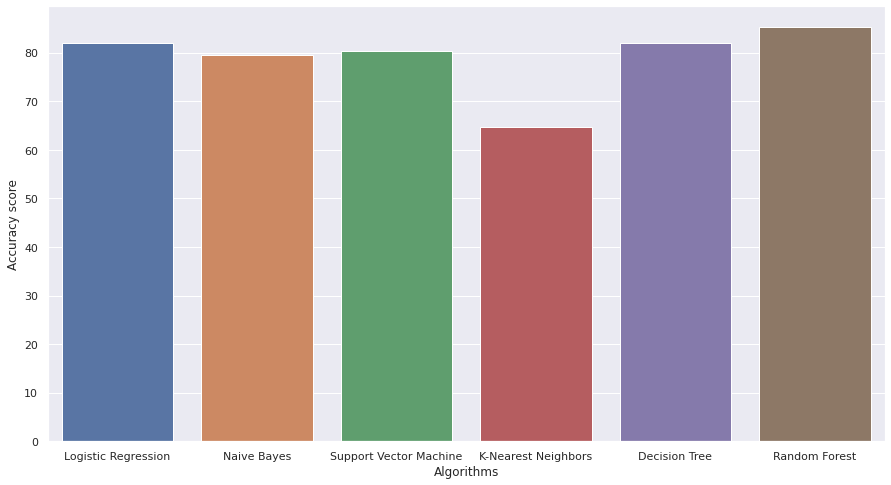

In [140]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithms,scores)

In [142]:
print("Hope, you find it useful!!😄😄😊😊😍😍")

Hope, you find it useful!!😄😄😊😊😍😍
